# package_LAB

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

import package_LAB
from package_LAB import LeadLag_RT, PID_RT, Margins, PID

import os

from importlib import reload
package_DBR = reload(package_DBR)
package_LAB = reload(package_LAB)

# LeadLag_RT()

In [2]:
help(LeadLag_RT)

Help on function LeadLag_RT in module package_LAB:

LeadLag_RT(MV, Kp, Tlead, Tlag, Ts, PV, PVInit=0, method='EBD')
    The function "LeadLag_RT" needs to be included in a "for or while loop".
    
    :MV: input vector
    :Kp: process gain
    :Tlead: lead time constant [s]
    :Tlag: lag time constant [s]
    :Ts: sampling period [s]
    :PV: output vector
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
    
    The function "FO_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



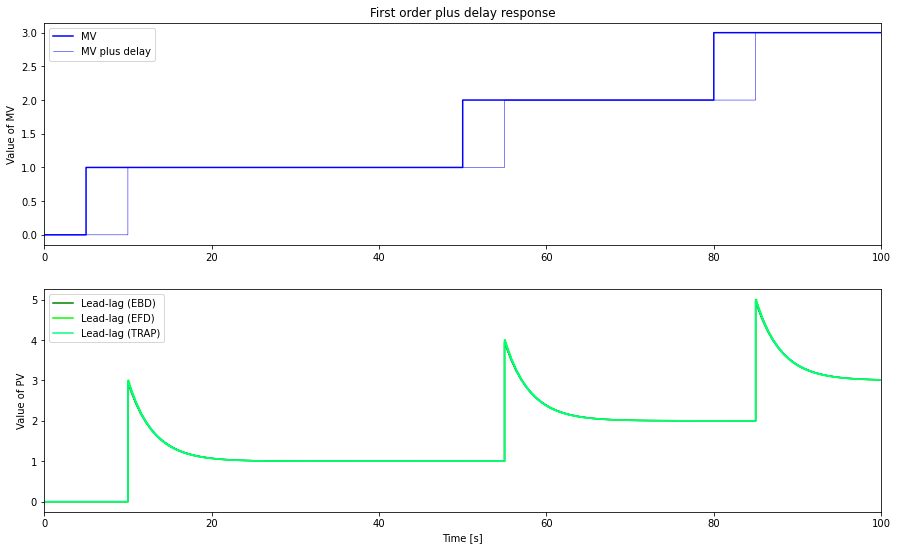

In [3]:
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
Tlead = 9
Tlag = 3
theta = 5

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    LeadLag_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_EBD)
    LeadLag_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_EFD,0,'EFD')
    LeadLag_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_TRAP,0,'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='Lead-lag (EBD)',where='post')
plt.step(t,PV_EFD,'lime',label='Lead-lag (EFD)',where='post')
plt.step(t,PV_TRAP,'springgreen',label='Lead-lag (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])

nameFile = 'Plots/Lead_lag'

if not os.path.exists('Plots'):
    os.makedirs('Plots')
    
plt.savefig(nameFile + '.png',transparent=True)
plt.savefig(nameFile + '.pdf',transparent=True)

# PID_RT()

In [4]:
help(PID_RT)

Help on function PID_RT in module package_LAB:

PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF, PVInit, method='EBD-EBD')
    :SP: SP (SetPoint) vector
    :PV: PV (Process value) vector
    :Man: Man (Manual controller mode) vector (true or false)
    :MVMan: MVMan (Manual value for MV) vector
    :MVFF: MVFF (Feedforward) vector
    
    :Kc: controller gain
    :Ti: integral time constant [s]
    :Td: derivative period [s]
    :alpha: Tfd = alpha*Td, Tfd is the derivative filter time constant [s]
    :Ts: sampling period [s] 
    
    :MVMin: minimum value of MV (used for saturation and anti wind-up)
    :MVMax: maximum value of MV (used for saturation and anti wind-up)
    
    :MV: MV (Manipulated Value) vector
    :MVP: MVP (Proportional part of MV) vector
    :MVI: MVI (Integral part of MV) vector
    :MVD: MVD (Derivative part of MV) vector
    :E: E (control error) vector
    
    :ManFF Activated FF in manual mode (optional: 

(0.0, 50.0)

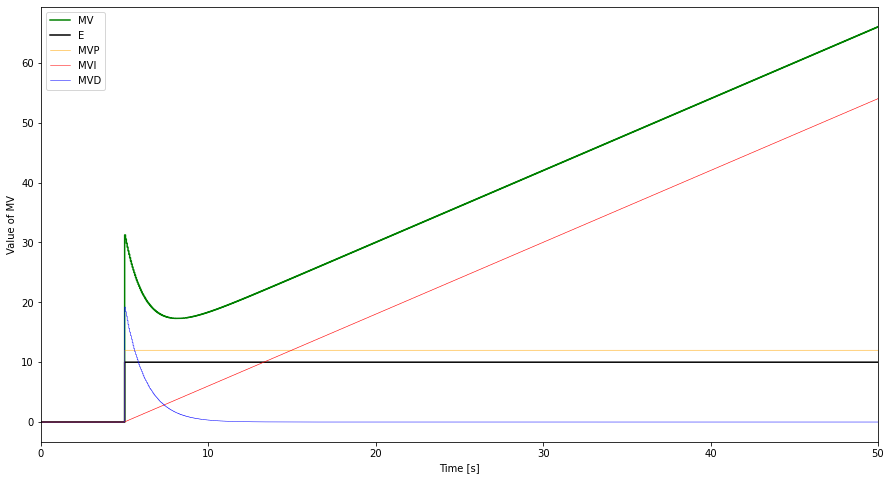

In [11]:
TSim = 50
Ts = 0.05
N = int(TSim/Ts) + 1

#Path for SP and PV
SPpath = {0: 0, 5: 10}
PVpath = {0: 0}
ManPath = {0: 0}
MVFFpath = {0: 0}

t = []
SP = []
PV = []
Man = []
MVMan = []
MVFF = []

Kc = 1.2
Ti = 10
Td = 2
alpha = 0.6

MVMin = 0
MVMax = 100

MV = []
MVP = []
MVI = []
MVD = []
E = []

ManFF = 0
PVInit = 0

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPpath,t,SP)
    SelectPath_RT(PVpath,t,PV)
    SelectPath_RT(ManPath,t,Man)
    SelectPath_RT(MVFFpath,t,MVFF)
    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF=False, PVInit=0, method='EBD-EBD')
    
plt.figure(figsize = (15,8))
plt.step(t,MV,'g-',label='MV',where='post')
plt.step(t,E,'black',label='E',where='post')
plt.step(t,MVP,'orange',label='MVP',where='post',linewidth=0.5)
plt.step(t,MVI,'red',label='MVI',where='post',linewidth=0.5)
plt.step(t,MVD,'blue',label='MVD',where='post',linewidth=0.5)
plt.ylabel('Value of MV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  


# Tests on alpha

(0.0, 30.0)

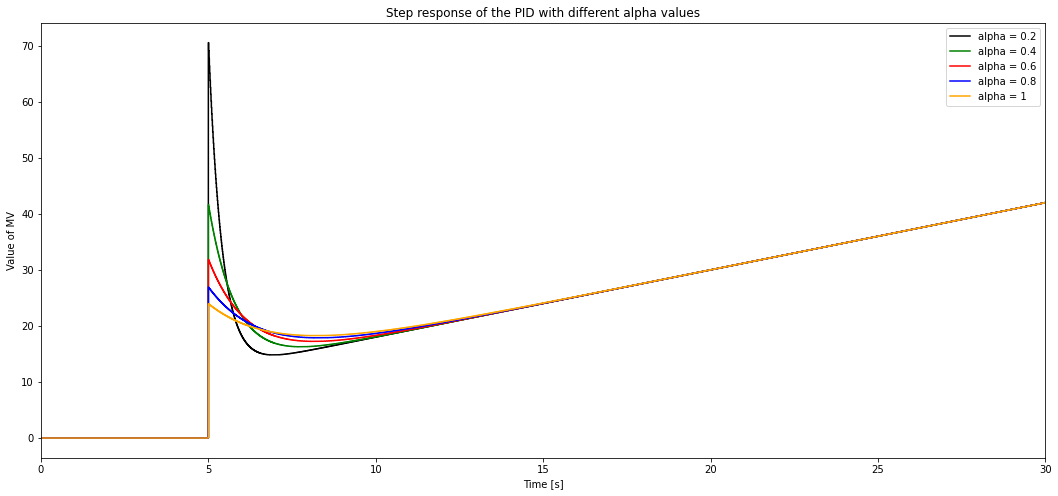

In [12]:
TSim = 30
Ts = 0.01
N = int(TSim/Ts) + 1

#Path for SP and PV
SPpath = {0: 0, 5: 10}
PVpath = {0: 0}
ManPath = {0: 0}
MVFFpath = {0: 0}

t = []
SP = []
PV = []
Man = []
MVMan = []
MVFF = []

Kc = 1.2
Ti = 10
Td = 2
alpha = [0.2, 0.4, 0.6, 0.8, 1]

MVMin = 0
MVMax = 100

MV = [[], [], [], [], []]
MVP = [[], [], [], [], []]
MVI = [[], [], [], [], []]
MVD = [[], [], [], [], []]
E = [[], [], [], [], []]

ManFF = 0
PVInit = 0

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPpath,t,SP)
    SelectPath_RT(PVpath,t,PV)
    SelectPath_RT(ManPath,t,Man)
    SelectPath_RT(MVFFpath,t,MVFF)
    
    for alpha_i in range(len(alpha)):
        PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha[alpha_i], Ts, MVMin, MVMax, MV[alpha_i], MVP[alpha_i], MVI[alpha_i], MVD[alpha_i], E[alpha_i], ManFF=False, PVInit=0, method='EBD-EBD')
    
color = ['black', 'green', 'red', 'blue', 'orange']
plt.figure(figsize = (18,8))
for alpha_i in range(len(alpha)):
    plt.step(t,MV[alpha_i], color[alpha_i], label = 'alpha = ' + str(alpha[alpha_i]), where='post')
plt.ylabel('Value of MV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.title('Step response of the PID with different alpha values')
plt.xlim([0, TSim])  


## PID test in manual mode, no FF

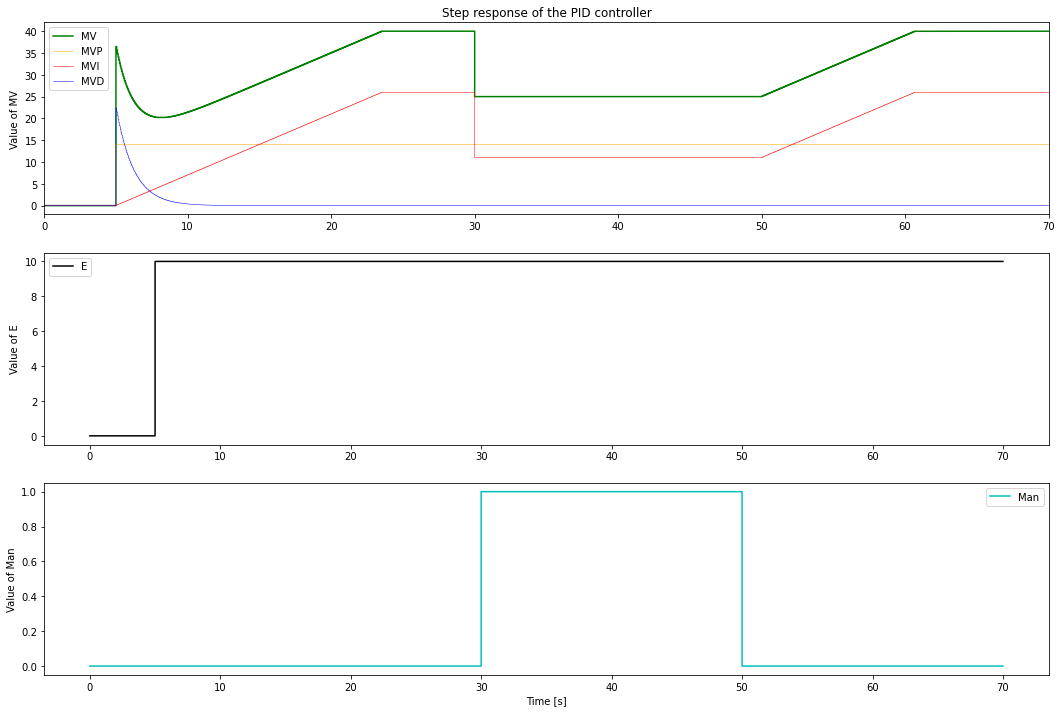

In [13]:
TSim = 70
Ts = 0.05
N = int(TSim/Ts) + 1

#Path for SP and PV
SPpath = {0: 0, 5: 10}
PVpath = {0: 0}
ManPath = {0: 0, 30: 1, 50: 0}
MVManPath = {0: 25}
MVFFpath = {0: 0}

t = []
SP = []
PV = []
Man = []
MVMan = []
MVFF = []

Kc = 1.4
Ti = 10
Td = 2
alpha = 0.6

MVMin = 0
MVMax = 40

MV1 = []
MVP = []
MVI = []
MVD = []
E = []

ManFF = False
PVInit = 0

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPpath,t,SP)
    SelectPath_RT(PVpath,t,PV)
    SelectPath_RT(ManPath,t,Man)
    SelectPath_RT(MVManPath,t,MVMan)
    SelectPath_RT(MVFFpath,t,MVFF)
    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV1, MVP, MVI, MVD, E, ManFF, PVInit, method='EBD-EBD')
    
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig.set_figheight(12)
fig.set_figwidth(18)

#plt.figure(figsize = (15,7))
ax1.step(t,MV1,'g-',label='MV',where='post')
ax1.step(t,MVP,'orange',label='MVP',where='post',linewidth=0.5)
ax1.step(t,MVI,'red',label='MVI',where='post',linewidth=0.5)
ax1.step(t,MVD,'blue',label='MVD',where='post',linewidth=0.5)
ax1.set_ylabel('Value of MV')
ax1.legend(loc='best')
ax1.set_xlim([0, TSim])
ax1.set_title('Step response of the PID controller')

ax2.step(t,E,'black',label='E',where='post')
ax2.set_ylabel('Value of E')
ax2.legend(loc='best')

ax3.step(t,Man,'c-',label='Man',where='post')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Value of Man')
ax3.legend(loc='best')


## PID test in manual mode, with FF

(0.0, 70.0)

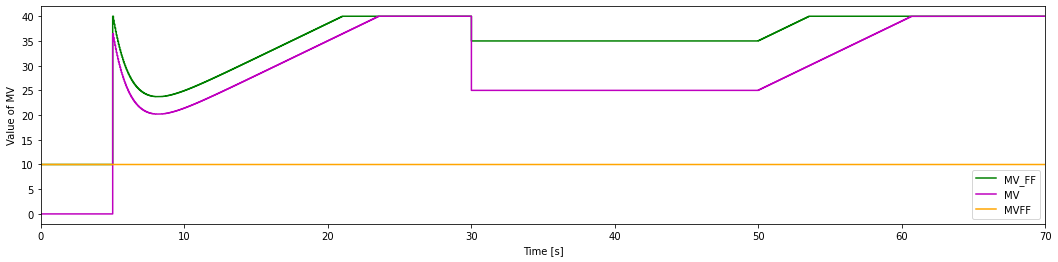

In [14]:
TSim = 70
Ts = 0.05
N = int(TSim/Ts) + 1

#Path for SP and PV
SPpath = {0: 0, 5: 10}
PVpath = {0: 0}
ManPath = {0: 0, 30: 1, 50: 0}
MVManPath = {0: 25}
MVFFpath = {0: 10}

t = []
SP = []
PV = []
Man = []
MVMan = []
MVFF = []

Kc = 1.4
Ti = 10
Td = 2
alpha = 0.6

MVMin = 0
MVMax = 40

MV = []
MVP = []
MVI = []
MVD = []
E = []

ManFF = True
PVInit = 0

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPpath,t,SP)
    SelectPath_RT(PVpath,t,PV)
    SelectPath_RT(ManPath,t,Man)
    SelectPath_RT(MVManPath,t,MVMan)
    SelectPath_RT(MVFFpath,t,MVFF)
    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF, PVInit, method='EBD-EBD')
    
plt.figure(figsize = (18,4))
plt.step(t,MV,'g-',label='MV_FF',where='post')
plt.step(t,MV1,'m-',label='MV',where='post')
#plt.step(t,Man,'c-',label='Man',where='post')
#plt.step(t,MVMan,'m-',label='MVMAN',where='post')
#plt.step(t,E,'black',label='E',where='post')
plt.step(t,MVFF,'orange',label='MVFF',where='post')
#plt.step(t,MVP,'orange',label='MVP',where='post',linewidth=0.5)
#plt.step(t,MVI,'red',label='MVI',where='post',linewidth=0.5)
#plt.step(t,MVD,'blue',label='MVD',where='post',linewidth=0.5)
plt.ylabel('Value of MV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  


# Margins

In [9]:
help(Margins)

Help on function Margins in module package_LAB:

Margins(P, C, omega, Show=True)
    :P: Process as defined by the class "Process"
        Use the following command to define the default process wich is simply a unit gain process:
            P = Process({})
        
        A delay, two lead time constants and 2 lag constants can be added.
    
        Use the following commands for a SOPDT process:
            P.parameters['Kp'] = 1.1
            P.parameters['Tlag1'] = 0.0
            P.parameters['Tlag2'] = 2.0
            P.parameters['theta'] = 2.0
            
        Use the following commands for a unit gain lead-lag process:
            P.parameters['Tlag1'] = 10.0
            P.parameters['Tlead1'] = 15.0
            
    :C: PID controller as defined by the class "PID"
        Use the following command to define the default PID controller wich is simply a unit gain PI controller with Ti = 10s:
            C = PID({})
            
        Use the following commands for a PID

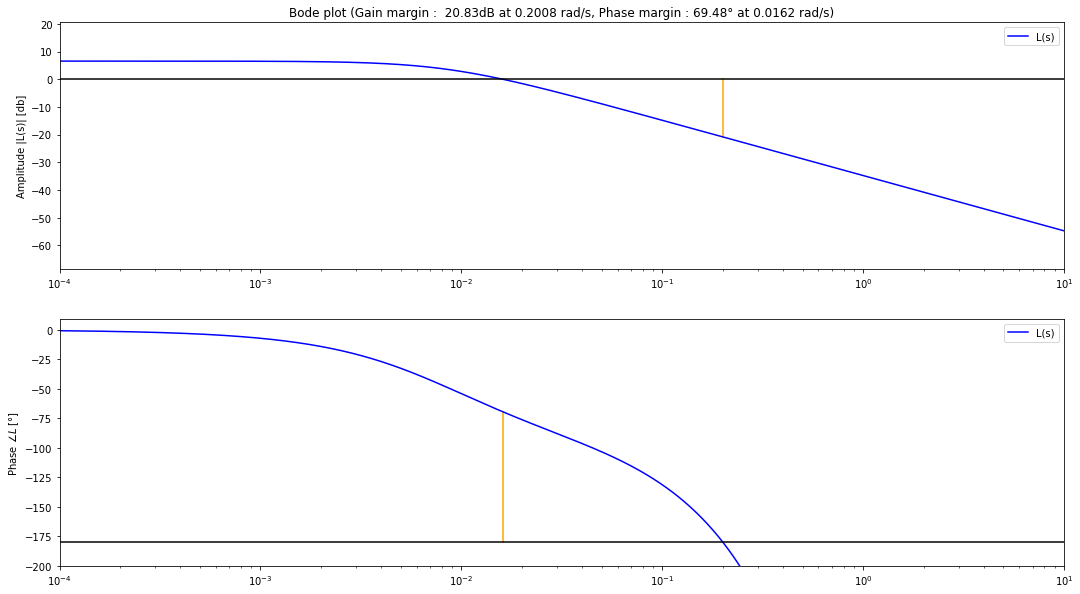

In [15]:
P = Process({}) # Default process = unit gain

# Parameters for input-output dynamics
Kp = 0.39017974996276006
T1p = 116.66713066631694
T2p = 5.8799095225973697e-05
thetap = 8.040136542300573

P.parameters['Kp'] = Kp
P.parameters['Tlag1'] = T1p
P.parameters['Tlag2'] = T2p
P.parameters['theta'] = thetap


C = PID({}) # Default process = unit gain

# PID data
Kc = 5.465642211208717
Ti = 116.66718946541216
Td = 5.879906559181849e-05
alpha = 1

C.parameters['Kc'] = Kc
C.parameters['Ti'] = Ti
C.parameters['Td'] = Td
C.parameters['alpha'] = alpha

omega = np.logspace(-4, 1, 10000)

Margins(P, C, omega)